The use of spatial information is required to correctly resample an image. (refer: http://yanivresearch.info/writtenMaterial/simpleITKNotebooks.pdf)

In [3]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

def myshow(images_list, row_num, col_num, figsize=(20,40)):
    num_subfig = len(images_list)
    plt.figure(figsize=figsize) # need to custom for how many images to show
    for i in range(num_subfig):
        plt.subplot(row_num, col_num, i + 1)
        plt.imshow(images_list[i], cmap="gray")
#         plt.axis('off')
    plt.show()

In [4]:
help(sitk.Resample)

Help on function Resample in module SimpleITK.SimpleITK:

Resample(*args)
    Resample(Image image1, Transform transform, itk::simple::InterpolatorEnum interpolator, double defaultPixelValue=0.0, itk::simple::PixelIDValueEnum outputPixelType) -> Image
    Resample(Image image1, Image referenceImage, Transform transform, itk::simple::InterpolatorEnum interpolator, double defaultPixelValue=0.0, itk::simple::PixelIDValueEnum outputPixelType) -> Image
    Resample(Image image1, VectorUInt32 size, Transform transform, itk::simple::InterpolatorEnum interpolator, VectorDouble outputOrigin, VectorDouble outputSpacing, VectorDouble outputDirection, double defaultPixelValue=0.0, itk::simple::PixelIDValueEnum outputPixelType) -> Image



In [5]:
help(sitk.Transform)

Help on class Transform in module SimpleITK.SimpleITK:

class Transform(builtins.object)
 |  A simplified wrapper around a variety of ITK transforms.
 |  
 |  
 |  The interface to ITK transform objects to be used with the ImageRegistrationMethod, ResampleImageFilter and other SimpleITK process objects. The transforms are designed to
 |  have a serialized array of parameters to facilitate optimization for
 |  registration.
 |  
 |  Provides a base class interface to any type of ITK transform. Objects
 |  of this type may have their interface converted to a derived interface
 |  while keeping the same reference to the ITK object.
 |  
 |  Additionally, this class provides a basic interface to a composite
 |  transforms.
 |  
 |  
 |  See:
 |   itk::CompositeTransform
 |  
 |  
 |  C++ includes: sitkTransform.h
 |  
 |  Methods defined here:
 |  
 |  AddTransform(self, t)
 |      AddTransform(Transform self, Transform t)
 |  
 |  GetDimension(self)
 |      GetDimension(Transform self) ->

In [6]:
label_path = '/Users/messi/Documents/PythonProjects/msd/dataset/Task03_Liver/labelsTr/liver_116.nii.gz'
sitk_label = sitk.ReadImage(label_path)
print(sitk_label.GetSize())
print(sitk_label.GetSpacing())
print(sitk_label.GetOrigin())
print(sitk_label.GetDirection())

(512, 512, 908)
(0.7890625, 0.7890625, 0.699999988079071)
(193.60499572753906, 56.605499267578125, -629.9000244140625)
(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)


(512, 512)
<class 'tuple'>
(0.7890625, 0.7890625)
(193.60499572753906, 56.605499267578125)
(-1.0, 0.0, 0.0, -1.0)
<class 'tuple'>


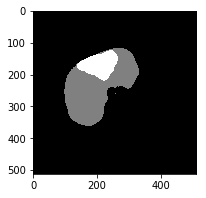

In [22]:
# slice one x,y plane
slice100 = sitk_label[:,:,607]
print(slice100.GetSize())
print(type(slice100.GetSize()))
print(slice100.GetSpacing())
print(slice100.GetOrigin())
print(slice100.GetDirection())
print(type(slice100.GetDirection()))
img = sitk.GetArrayFromImage(slice100)
img = img[::-1,::-1]
myshow([img], 1,1,figsize=(3,3))

### resample to fixed spacings

In [8]:
# resample to fixed spacings
newSpacing = [0.4,0.4]
newSize = np.asarray(slice100.GetSize())*np.asarray(slice100.GetSpacing())/np.asarray(newSpacing)
newSize = newSize.astype(dtype=int)
print(newSize)

[1010 1010]


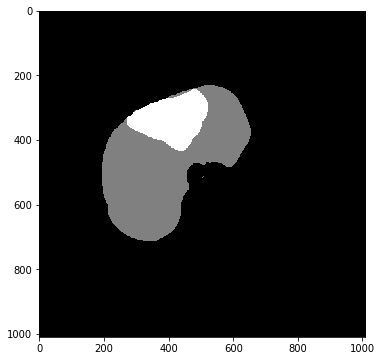

In [9]:
fixedSpacImage = sitk.Resample(slice100, newSize.tolist(), sitk.Transform(), sitk.sitkNearestNeighbor, slice100.GetOrigin(), tuple(newSpacing), slice100.GetDirection())
img = sitk.GetArrayFromImage(fixedSpacImage)[::-1,::-1]
myshow([img], 1,1,figsize=(6,6))

### resample to fixed size

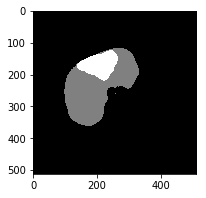

(512, 512)


In [10]:
### resample to fixed size
# the example is resample the above resampled image back 
newSize = np.asarray(slice100.GetSize(), dtype=int)
fixedSizeImage = sitk.Resample(fixedSpacImage, newSize.tolist(), sitk.Transform(), sitk.sitkNearestNeighbor, slice100.GetOrigin(), slice100.GetSpacing(), slice100.GetDirection())
img = sitk.GetArrayFromImage(fixedSizeImage)[::-1,::-1]
myshow([img], 1,1,figsize=(3,3))
print(fixedSizeImage.GetSize())

### resample a numpy array to fixed size

In [15]:
# resample a numpy array to fixed size
# create sitk_array from array
array = sitk.GetArrayFromImage(fixedSpacImage)
sitk_array = sitk.GetImageFromArray(array)
sitk_array.SetOrigin(slice100.GetOrigin())
sitk_array.SetSpacing(tuple(newSpacing))
sitk_array.SetDirection(slice100.GetDirection())

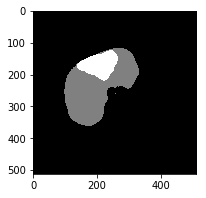

(512, 512)


In [20]:
newSize = np.asarray(slice100.GetSize(), dtype=int)
fixedSizeImage = sitk.Resample(sitk_array, newSize.tolist(), sitk.Transform(), sitk.sitkNearestNeighbor, slice100.GetOrigin(), slice100.GetSpacing(), slice100.GetDirection())
img = sitk.GetArrayFromImage(fixedSizeImage)[::-1,::-1]
myshow([img], 1,1,figsize=(3,3))
print(fixedSizeImage.GetSize())